In [1]:
# import opendatasets as od
# url=""
# od.download(url)

In [2]:
import numpy as np
import pandas as pd
import  matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_tracks=pd.read_csv("tracks.csv")
df_tracks.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


# null values

In [4]:
pd.isnull(df_tracks).sum()

id                   0
name                71
popularity           0
duration_ms          0
explicit             0
artists              0
id_artists           0
release_date         0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
time_signature       0
dtype: int64

In [5]:
df_tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                586672 non-null  object 
 1   name              586601 non-null  object 
 2   popularity        586672 non-null  int64  
 3   duration_ms       586672 non-null  int64  
 4   explicit          586672 non-null  int64  
 5   artists           586672 non-null  object 
 6   id_artists        586672 non-null  object 
 7   release_date      586672 non-null  object 
 8   danceability      586672 non-null  float64
 9   energy            586672 non-null  float64
 10  key               586672 non-null  int64  
 11  loudness          586672 non-null  float64
 12  mode              586672 non-null  int64  
 13  speechiness       586672 non-null  float64
 14  acousticness      586672 non-null  float64
 15  instrumentalness  586672 non-null  float64
 16  liveness          58

In [6]:
df_tracks[['artist_name','popularity']].max()

KeyError: "['artist_name'] not in index"

In [ ]:
sorted_df=df_tracks.sort_values('popularity',ascending=True).head(10)
sorted_df

In [ ]:
df_tracks.describe().transpose()

In [ ]:
most_popular=df_tracks.query('popularity>90',inplace=False).sort_values('popularity',ascending=False)
most_popular[:10]
# df_tracks['Popularity']

In [ ]:
df_tracks.set_index('release_date',inplace=True)
df_tracks.index=pd.to_datetime(df_tracks.index)
df_tracks.head()

In [ ]:
df_tracks[['artist_name']].iloc[18]

## Song Duration ms to sec

In [ ]:
df_tracks["duration"]=df_tracks["duration_ms"].apply(lambda x:round(x/1000))
df_tracks.drop("duration_ms",inplace=True,axis=1)

In [ ]:
df_tracks

[Text(0.5, 0, 'popularity'),
 Text(1.5, 0, 'duration_ms'),
 Text(2.5, 0, 'danceability'),
 Text(3.5, 0, 'energy'),
 Text(4.5, 0, 'loudness'),
 Text(5.5, 0, 'speechiness'),
 Text(6.5, 0, 'acousticness'),
 Text(7.5, 0, 'instrumentalness'),
 Text(8.5, 0, 'liveness'),
 Text(9.5, 0, 'valence'),
 Text(10.5, 0, 'tempo'),
 Text(11.5, 0, 'time_signature')]

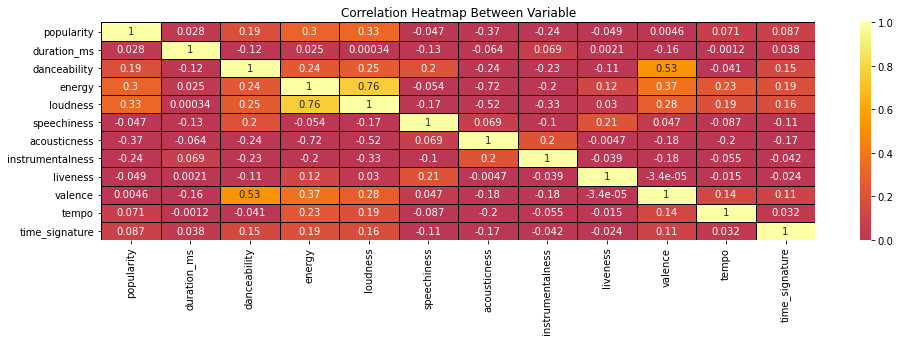

In [7]:
corr_df=df_tracks.drop(["key","mode","explicit"],axis=1).corr(method="pearson")
plt.figure(figsize=(16,4))
heatmap=sns.heatmap(corr_df,annot=True,fmt=".2g",vmin=0,vmax=1,center=0,cmap="inferno",linewidths=1,linecolor="k",)
heatmap.set_title("Correlation Heatmap Between Variable")
heatmap.set_xticklabels(heatmap.get_xticklabels(),rotation=90)

In [ ]:
sample_df=df_tracks.sample(int(0.004*len(df_tracks)))
print(len(sample_df))

In [ ]:
plt.figure(figsize=(10,6))
sns.regplot(data=sample_df,y="loudness",x="energy",color="c").set_title("Loudness Vs Energy")

In [ ]:
plt.figure(figsize=(10,6))
sns.regplot(data=sample_df,y="popularity",x="acousticness",color="r").set_title("Popularity Vs Acousticness")

In [ ]:
df_tracks['dates']=df_tracks.index.get_level_values('release_date')
df_tracks.dates=pd.to_datetime(df_tracks.dates)
years=df_tracks.dates.dt.year
years

In [ ]:
sns.displot(years,discrete=True,aspect=2,height=5,kind="hist").set(title="Number of songs per year")

In [ ]:
total_dur=df_tracks.duration
fig_dim=(18,7)
fig,ax=plt.subplots(figsize=fig_dim)
fig=sns.barplot(x=years,y=total_dur,ax=ax,errwidth=False).set(title="Year vs Duration")
plt.xticks(rotation=90)

## Analyze the average duration of the songs over the year

In [ ]:
sns.set_style(style="whitegrid")
fig,ax=plt.subplots(figsize=(10,6))
fig=sns.lineplot(x=years,y=total_dur,ax=ax).set(title="Year vs Duration")
plt.xticks(rotation=60)

In [9]:
df_tracks

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.744000,0.1510,0.1270,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.000000,0.1480,0.6550,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.021800,0.2120,0.4570,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.918000,0.1040,0.3970,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.130000,0.3110,0.1960,103.220,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586667,5rgu12WBIHQtvej2MdHSH0,云与海,50,258267,0,['阿YueYue'],['1QLBXKM5GCpyQQSVMNZqrZ'],2020-09-26,0.560,0.5180,0,-7.471,0,0.0292,0.785,0.000000,0.0648,0.2110,131.896,4
586668,0NuWgxEp51CutD2pJoF4OM,blind,72,153293,0,['ROLE MODEL'],['1dy5WNgIKQU6ezkpZs4y8z'],2020-10-21,0.765,0.6630,0,-5.223,1,0.0652,0.141,0.000297,0.0924,0.6860,150.091,4
586669,27Y1N4Q4U3EfDU5Ubw8ws2,What They'll Say About Us,70,187601,0,['FINNEAS'],['37M5pPGs6V1fchFJSgCguX'],2020-09-02,0.535,0.3140,7,-12.823,0,0.0408,0.895,0.000150,0.0874,0.0663,145.095,4
586670,45XJsGpFTyzbzeWK8VzR8S,A Day At A Time,58,142003,0,"['Gentle Bones', 'Clara Benin']","['4jGPdu95icCKVF31CcFKbS', '5ebPSE9YI5aLeZ1Z2g...",2021-03-05,0.696,0.6150,10,-6.212,1,0.0345,0.206,0.000003,0.3050,0.4380,90.029,4


In [11]:
df_data2=pd.read_csv("SpotifyFeatures.csv")
df_data2.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


Text(0, 0.5, 'Genres')

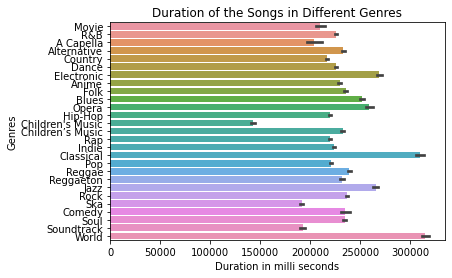

In [18]:
plt.title("Duration of the Songs in Different Genres")
sns.color_palette("rocket",as_cmap=True)
sns.barplot(y="genre",x="duration_ms",data=df_data2)
plt.xlabel("Duration in milli seconds")
plt.ylabel("Genres")

[Text(0.5, 1.0, 'Top 5 Genres by Popularity')]

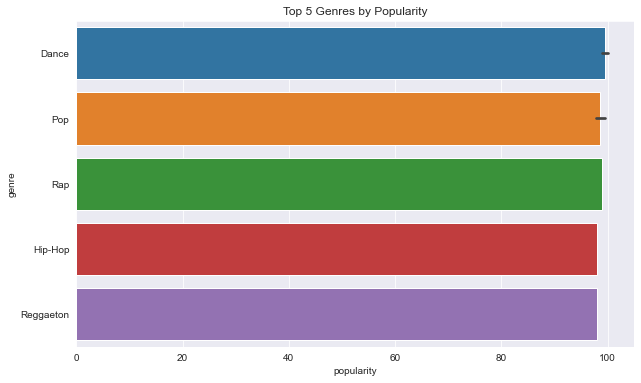

In [20]:
sns.set_style(style="darkgrid")
plt.figure(figsize=(10,6))
famous=df_data2.sort_values("popularity",ascending=False).head(10)
sns.barplot(y='genre',x='popularity',data=famous).set(title="Top 5 Genres by Popularity")